In [186]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import dateutil
import plotly.plotly as py
from matplotlib.colors import LogNorm

In [59]:
rawData = pd.read_csv("C:\\Users\\eladiomontero\\PycharmProjects\\KB\\data.csv")

In [60]:
rawData['game_date'] = [dateutil.parser.parse(x) for x in rawData['game_date']]

In [124]:
test = rawData[pd.isnull(rawData.shot_made_flag)]
training = rawData[-pd.isnull(rawData.shot_made_flag)]

In [48]:
print("Test:" + str(len(test)))
print("Training:" + str(len(training)))

Test:5000
Training:25697


In [49]:
ncols = len(rawData.columns)

In [50]:
print ("Number of rows: " + str(len(training)) + "\n Number of columns: " + str(ncols))

Number of rows: 25697
 Number of columns: 25


In [51]:
print(training.describe())



       game_event_id       game_id           lat         loc_x         loc_y  \
count   25697.000000  2.569700e+04  25697.000000  25697.000000  25697.000000   
mean      249.348679  2.474109e+07     33.953043      7.148422     91.257345   
std       149.778520  7.738108e+06      0.088152    110.073147     88.152106   
min         2.000000  2.000001e+07     33.253300   -250.000000    -44.000000   
25%       111.000000  2.050006e+07     33.884300    -67.000000      4.000000   
50%       253.000000  2.090034e+07     33.970300      0.000000     74.000000   
75%       367.000000  2.960027e+07     34.040300     94.000000    160.000000   
max       653.000000  4.990009e+07     34.088300    248.000000    791.000000   

                lon  minutes_remaining        period      playoffs  \
count  25697.000000       25697.000000  25697.000000  25697.000000   
mean    -118.262652           4.886796      2.520800      0.146243   
std        0.110073           3.452475      1.151626      0.353356   

In [52]:
print(training.head())



         action_type combined_shot_type  game_event_id   game_id      lat  \
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   
5          Jump Shot          Jump Shot            244  20000012  34.0553   

   loc_x  loc_y       lon  minutes_remaining  period   ...          shot_type  \
1   -157      0 -118.4268                 10       1   ...     2PT Field Goal   
2   -101    135 -118.3708                  7       1   ...     2PT Field Goal   
3    138    175 -118.1318                  6       1   ...     2PT Field Goal   
4      0      0 -118.2698                  6       2   ...     2PT Field Goal   
5   -145    -11 -118.4148                  9       3   ...     2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zo

In [53]:
print(training.tail())


              action_type combined_shot_type  game_event_id   game_id  \
30691  Driving Layup Shot              Layup            382  49900088   
30692           Jump Shot          Jump Shot            397  49900088   
30694   Running Jump Shot          Jump Shot            426  49900088   
30695           Jump Shot          Jump Shot            448  49900088   
30696           Jump Shot          Jump Shot            471  49900088   

           lat  loc_x  loc_y       lon  minutes_remaining  period   ...     \
30691  34.0443      0      0 -118.2698                  7       4   ...      
30692  33.9963      1     48 -118.2688                  6       4   ...      
30694  33.8783   -134    166 -118.4038                  3       4   ...      
30695  33.7773     31    267 -118.2388                  2       4   ...      
30696  33.9723      1     72 -118.2688                  0       4   ...      

            shot_type        shot_zone_area        shot_zone_basic  \
30691  2PT Field Goal 

In [138]:
print(training.dtypes)


action_type                   object
combined_shot_type            object
game_event_id                  int64
game_id                        int64
lat                          float64
loc_x                          int64
loc_y                          int64
lon                          float64
minutes_remaining              int64
period                         int64
playoffs                       int64
season                        object
seconds_remaining              int64
shot_distance                  int64
shot_made_flag               float64
shot_type                     object
shot_zone_area                object
shot_zone_basic               object
shot_zone_range               object
team_id                        int64
team_name                     object
game_date             datetime64[ns]
matchup                       object
opponent                      object
shot_id                        int64
dtype: object


In [126]:
flagsCount = training.shot_made_flag.value_counts()

In [127]:
print(flagsCount)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64


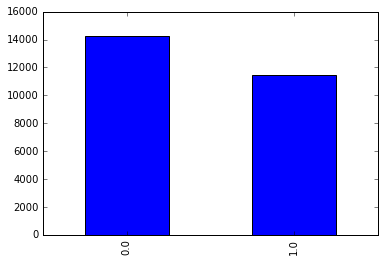

In [128]:
flagsCount.plot(kind = 'bar')

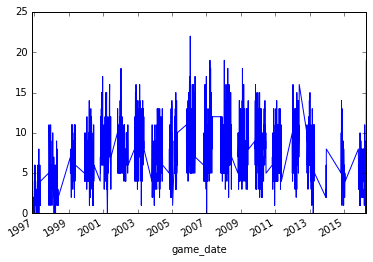

In [129]:
training.groupby('game_date').shot_made_flag.sum().plot(kind = 'line')

In [130]:
shots_made = training[training.shot_made_flag == 1]
shots_failed = training[training.shot_made_flag == 0]


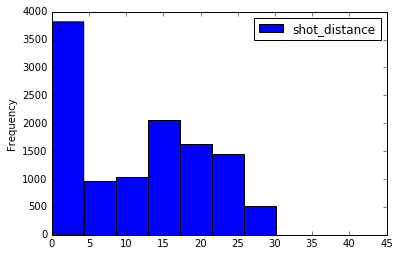

In [131]:
shots_made.loc[:,['shot_distance']].plot(kind = 'hist')

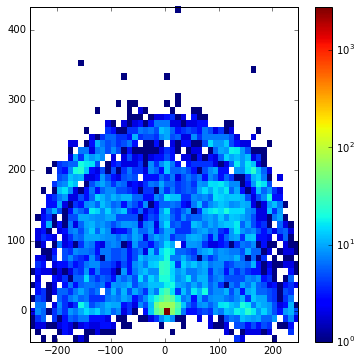

In [199]:
plt.figure(figsize=(6,6))
plt.hist2d(shots_made.loc_x,shots_made.loc_y,bins = 50, norm=LogNorm())
plt.colorbar()
plt.show()

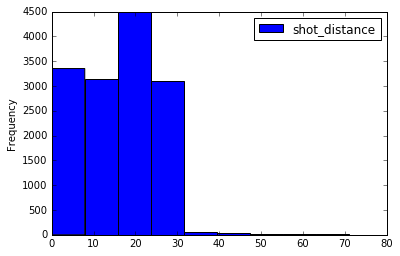

In [132]:
shots_failed.loc[:,['shot_distance']].plot(kind = 'hist')

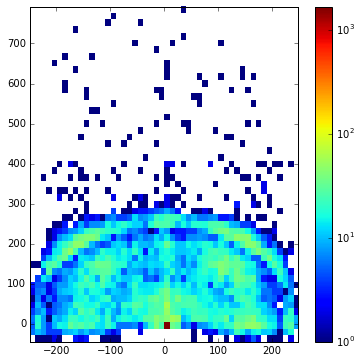

In [198]:
plt.figure(figsize=(6,6))
plt.hist2d(shots_failed.loc_x,shots_failed.loc_y,bins = 50, norm=LogNorm())
plt.colorbar()
plt.show()

In [201]:
#This is to specify if the match was home or away
home_training = -training.matchup.str.contains("@")
home_training = home_training * 1

home_testing = -test.matchup.str.contains("@")
home_testing = home_testing * 1

In [203]:
training.Home = home_training
test.Home = home_testing